In [1]:
# import sys
# sys.path.append('/home/student.unimelb.edu.au/shubham1/anaconda3/lib/python3.7/site-packages')
# % matplotlib notebook
from __future__ import print_function

import numpy as np
from numpy import linalg as la

import matplotlib as mpl
# mpl.style.use('classic')
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from   matplotlib.ticker import MultipleLocator, FormatStrFormatter

import os

from scipy.interpolate import griddata
import scipy.sparse.linalg as spla

In [13]:
# Import freq and S.V. data

# change path
cpath = '/home/shubham1/spartan_mount/hwu1/slicedatareadWriteHipstar/jupyter_codes/CD_M04_resolvent_freq_sweep_results'
data_file  = cpath + '/first_3_sing_vals.npz'


sigma_1  = np.load(data_file)['sing_val_1']
sigma_2  = np.load(data_file)['sing_val_2']
sigma_3  = np.load(data_file)['sing_val_3']
freq1     = np.load(data_file)['freq']



# Import DNS PSD data
#...

In [14]:
font_size = 20
plt.rcParams.update({'font.size': font_size})

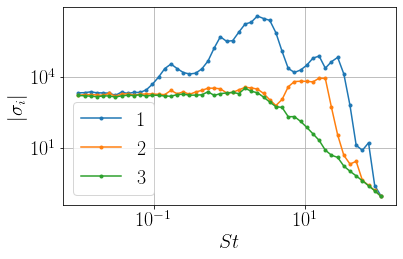

In [15]:
plt.figure()
plt.loglog(freq1,np.abs(sigma_1),'.-', label='1')
plt.loglog(freq1,np.abs(sigma_2),'.-', label='2')
plt.loglog(freq1,np.abs(sigma_3),'.-', label='3')

#plt.loglog(freq,cd_psd,'.-',label='Drag')
plt.xlabel(r'$St$')
plt.ylabel(r'$|\sigma_i|$')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

#plt.savefig('/home/georgesw/airfoil_rapack/Data/SV_plot/SV_123_hierarchy.eps', format='eps')
plt.show()


In [8]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
import sys
from scipy.fftpack import fft, ifft
from scipy import signal
abspath = '/home/shubham1/spartan_mount'
# abspath = '/data/cephfs/punim0895'
sys.path.append(abspath + '/hwu1/slicedatareadWriteHipstar/jupyter_codes')
# from deriv import *
# from lib_msh import *
import scipy.io as sio

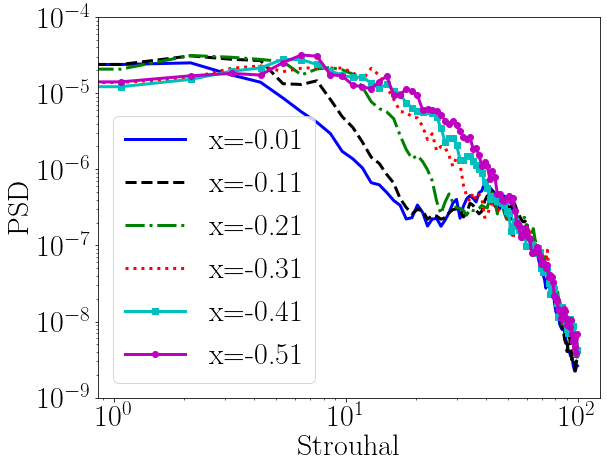

In [51]:
path = abspath + '/hwu1/slicedatareadWriteHipstar/cd_airfoil_inputData_allMach/'
# text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
colo = ['b','k--','g-.','r:','cs-','mo-']
M=[2,3,4,5]
M=[4]
x_loc2=np.arange(-0.01,-0.61,-0.1)
dtnon=[0.003,0.003,0.005,0.005]
dtnon=[0.005]

freq    = np.zeros((len(M),len(x_loc2),94))
Pxx_den = np.zeros((len(M),len(x_loc2),94))

for i in range(len(M)):
    Mach=M[i]*0.1
    Re=100000
    rho=1.2
    nu=1.5e-5
    Uref=np.sqrt(1.4*287*300)*Mach #reference velocity
    Lref=Re*nu/Uref #reference length: airfoil chord length in my case
    Pref = rho*Uref**2 #rho*Uref**2
    tconv=Lref/Uref
    dt=tconv*dtnon[i]
    f = 1/dtnon[i]
    DATAF2 = np.load(path+'M0'+str(M[i])+'_spod_data/flowdata_b2_M0'+str(M[i])+'.npz')
    DATAG2 = np.load(path+'M0'+str(M[i])+'_spod_data/griddata_b2_M0'+str(M[i])+'.npz')


    Nt = len(DATAF2['p1'][0,0,:])
    
    p = DATAF2['p1']
    x = DATAG2['x1']
    y = DATAG2['y1']
#     p=np.subtract(p , np.expand_dims(np.mean(PP,axis=-1),axis=2))*rho*Uref**2

    index2 = np.zeros(len(x_loc2),dtype=int)


    for j in range(len(x_loc2)):
        # finding an index on suction surface for all the x locations
        index2[j] = np.max(np.where(np.abs(DATAG2['x1'][:,0] - x_loc2[j]) < 0.003))
    
    
    for j in range(len(x_loc2)):
        fig = plt.figure(i,figsize=(9,7)) 
        plt.rcParams['font.size']=30
        freq[i,j,:], Pxx_den[i,j,:] = signal.welch(p[index2[j],0,:], f, nperseg=Nt//16)
        plt.loglog(freq[i,j,:], Pxx_den[i,j,:],colo[j],label='x='+str(x_loc2[j])[0:5],lw=3)
        plt.ylim([1e-9, 1e-4])
        plt.xlabel('Strouhal')
        plt.ylabel('PSD')
        plt.legend(loc=0)


#     plt.savefig('specloc_i='+str(i)+'_j='+str(j)+'.png',dpi=300,bbox_inches="tight")


plt.show()


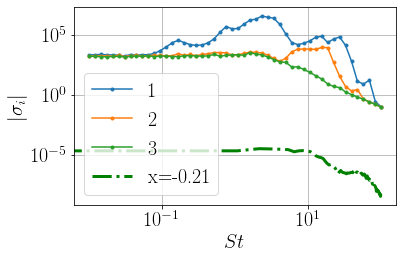

In [16]:
plt.figure()
plt.loglog(freq1,np.abs(sigma_1),'.-', label='1')
plt.loglog(freq1,np.abs(sigma_2),'.-', label='2')
plt.loglog(freq1,np.abs(sigma_3),'.-', label='3')
plt.loglog(freq[i,j,:], Pxx_den[i,j,:],colo[j],label='x='+str(x_loc2[j])[0:5],lw=3)

#plt.loglog(freq,cd_psd,'.-',label='Drag')
plt.xlabel(r'$St$')
plt.ylabel(r'$|\sigma_i|$')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

#plt.savefig('/home/georgesw/airfoil_rapack/Data/SV_plot/SV_123_hierarchy.eps', format='eps')
plt.show()


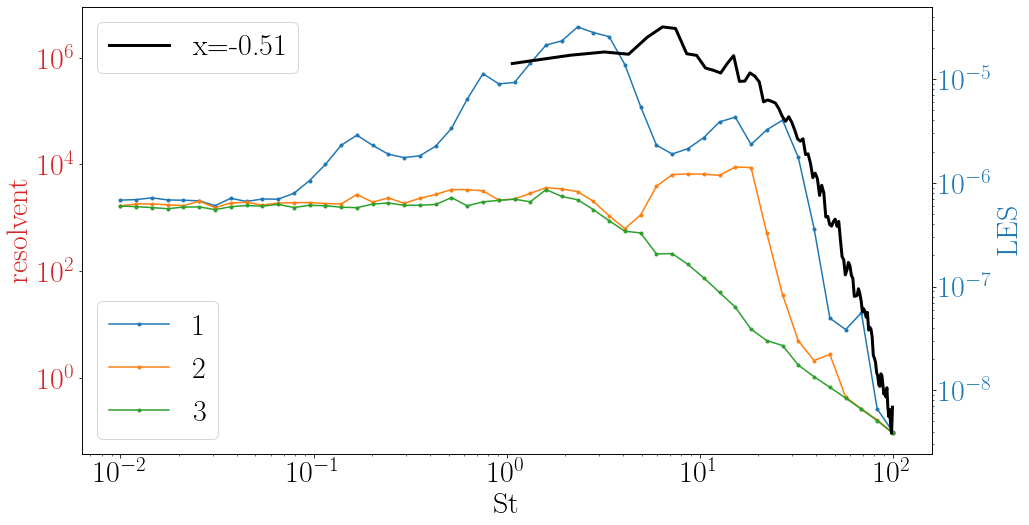

In [61]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots(figsize = (15,8))

color = 'tab:red'
ax1.set_xlabel('St')
ax1.set_ylabel('resolvent', color=color)
ax1.loglog(freq1,np.abs(sigma_1),'.-', label='1')
ax1.loglog(freq1,np.abs(sigma_2),'.-', label='2')
ax1.loglog(freq1,np.abs(sigma_3),'.-', label='3')
ax1.legend(loc=3)
# ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('LES', color=color)  # we already handled the x-label with ax1
for j in [5]:
    ax2.loglog(freq[0,j,1:], Pxx_den[0,j,1:],label='x='+str(x_loc2[j])[0:5],lw=3,color='k')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [25]:
freq.shape

(1, 3, 94)